In [1]:
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
PATH = "college.csv"
dataset = pd.read_csv(PATH)

In [3]:
for column in dataset:
    if type(dataset[column][0]) is str:
        dataset[column] = pd.factorize(dataset[column])[0]

<AxesSubplot:>

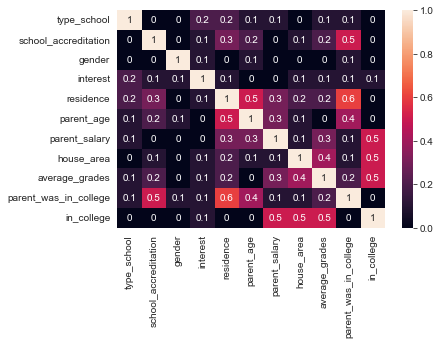

In [4]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [5]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop('in_college', axis=1),
    dataset["in_college"],
    test_size=0.2
)

In [6]:
model = GaussianNB()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)

print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.72


In [11]:
dataset["predictions"] = model.predict(
    dataset.drop(
        "in_college", axis=1
    )
)

dataset

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,predictions
0,0,0,0,0,0,56,6950000,83.0,84.09,False,True,True
1,0,0,0,0,0,57,4410000,76.8,86.91,False,True,False
2,0,1,1,1,0,50,6500000,80.6,87.43,False,True,True
3,1,1,0,1,1,49,6600000,78.2,82.12,True,True,True
4,0,0,1,1,0,57,5250000,75.1,86.79,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,49,7420000,63.6,85.99,True,True,True
996,0,1,1,0,1,51,7480000,84.3,89.72,True,True,True
997,1,0,0,0,0,49,5550000,75.2,79.56,False,True,True
998,0,1,0,2,1,53,5840000,105.8,87.18,True,True,True
